# Analyze detailed cases for each target

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
from pathlib import Path
dataset_name = 'scop_cl_equal_globular100_identity95_coverage60'
score_dir = Path('../../../../score') / dataset_name
plot_dir = score_dir / 'plot' / 'MQA'
plot_dir.mkdir(parents=True, exist_ok=True)
# model score
tmscore_path = (score_dir / (dataset_name + '_final')).with_suffix('.csv')
tmscore_df = pd.read_csv(tmscore_path, index_col=0)
alignment_quality_row_columns = ['identity', 'positive', 'coverage', 'identity(-misres)', 'positive(-misres)', 'coverage(-misres)']
alignment_quality_columns = [c + '(%)' for c in alignment_quality_row_columns]
for c in alignment_quality_row_columns:
    tmscore_df[c + '(%)'] = tmscore_df[c] / tmscore_df['seq_len']
p3cmqa_df = pd.read_csv(score_dir / 'P3CMQA.csv', index_col=0).rename({'Score': 'P3CMQA'}, axis=1)
dope_df = pd.read_csv(score_dir / 'dope.csv', index_col=0)
proq3_df = pd.read_csv(score_dir / 'proq3.csv', index_col=0)
sbrod_df = pd.read_csv(score_dir / 'sbrod.csv', index_col=0)
dan_df = pd.read_csv(score_dir / 'DeepAccNet.csv', index_col=0)
method_df = pd.concat([p3cmqa_df, dope_df, dan_df, sbrod_df, proq3_df], axis=1)
df = pd.merge(tmscore_df, method_df, left_on='model', right_index=True)
df['dope'] = - df['dope']
df['soap'] = - df['soap']
rename_dict = {name: name.upper() for name in ['dope', 'soap', 'sbrod']}
df = df.rename(rename_dict, axis=1)
df

,model,GDT_TS,GDT_HA,TMscore,target,template,seq_len,identity,positive,coverage,...,P3CMQA,DOPE,SOAP,DeepAccNet,DeepAccNet-Bert,SBROD,ProQ2D,ProQRosCenD,ProQRosFAD,ProQ3D
0,1AYZ_A_3OJ4_A_2_1,0.864,0.704,0.912,1AYZ_A,3OJ4_A_2,153,55,89,145,...,0.936,16173.431,87773.641,0.704,0.665,1.496,0.592,0.748,0.886,0.675
1,1AYZ_A_4L83_A_3_3,0.858,0.678,0.907,1AYZ_A,4L83_A_3,153,50,82,150,...,0.931,16108.172,79806.367,0.611,0.625,1.502,0.607,0.733,0.888,0.721
2,1AYZ_A_6TTU_D_1_5,0.851,0.678,0.898,1AYZ_A,6TTU_D_1,153,56,90,143,...,0.871,15592.919,75800.398,0.574,0.564,1.463,0.554,0.671,0.810,0.622
3,1AYZ_A_4GPR_A_1_1,0.842,0.688,0.872,1AYZ_A,4GPR_A_1,153,55,89,139,...,0.860,15673.749,81208.062,0.668,0.622,1.475,0.512,0.566,0.809,0.581
4,1AYZ_A_1TTE_A_3_5,0.657,0.423,0.787,1AYZ_A,1TTE_A_3,153,44,79,149,...,0.500,13570.403,34812.891,0.326,0.409,1.404,0.509,0.537,0.658,0.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14620,6SPF_T_3PYO_T_2_1,0.862,0.707,0.853,6SPF_T,3PYO_T_2,94,42,56,88,...,0.801,7493.219,40997.273,0.474,0.545,1.337,0.432,0.721,0.816,0.680
14621,6SPF_T_3J7Y_U_3_1,0.614,0.444,0.598,6SPF_T,3J7Y_U_3,94,27,46,92,...,0.561,6795.809,34295.250,0.426,0.500,1.306,0.348,0.532,0.622,0.464
14622,6SPF_T_1PNU_R_2_4,0.790,0.590,0.775,6SPF_T,1PNU_R_2,94,37,54,87,...,0.726,7013.454,31020.203,0.389,0.497,1.316,0.393,0.463,0.443,0.436
14623,6SPF_T_5O60_U_3_4,0.832,0.692,0.840,6SPF_T,5O60_U_3,94,36,49,87,...,0.784,7647.284,42679.781,0.507,0.576,1.329,0.446,0.657,0.823,0.657


In [3]:
import sys
sys.path.append('../../../mqa')
from eval import eval, eval_get_df
column_name = ['identity(%)', 'positive(%)', 'coverage(%)', 'DOPE', 'SOAP', 'ProQ3D', 'SBROD', 'DeepAccNet', 'DeepAccNet-Bert', 'P3CMQA']
pef_df = eval(df, columns=column_name, label_name='GDT_TS')
# pef_df.to_csv(score_dir / 'mqa_result_fixed.csv')
pef_df

100


,Method,GDT_TS Pearson,GDT_TS Spearman,GDT_TS Loss,GDT_TS MAE
0,identity(%),0.636,0.507,4.096,0.371
1,positive(%),0.661,0.540,4.902,0.215
2,coverage(%),0.438,0.359,10.068,0.211
3,DOPE,0.745,0.675,4.013,NaN
4,SOAP,0.642,0.603,3.818,NaN
5,ProQ3D,0.725,0.663,4.562,0.129
6,SBROD,0.676,0.613,5.797,NaN
7,DeepAccNet,0.748,0.675,3.288,0.238
8,DeepAccNet-Bert,0.821,0.754,3.372,0.173
9,P3CMQA,0.838,0.777,3.091,0.096


In [4]:
target_info_df = df.groupby('target').head(1)[['target', 'Class', 'seq_len']]
target_info_dftarget_info_df = df.groupby('target').head(1)[['target', 'Class', 'seq_len']]
target_info_df

,target,Class,seq_len
0,1AYZ_A,alpha + beta,153
150,1AZ5_A,All beta,99
300,1BQU_A,All beta,115
450,1DE4_A,alpha + beta,178
600,1EA9_C,alpha / beta,382
...,...,...,...
13875,6K9F_B,All alpha,87
14025,6KNA_A,alpha + beta,76
14175,6KWQ_A,alpha + beta,462
14325,6O8W_g,All alpha,154


In [5]:
sys.path.append('../../..')
from categorize_target_by_template_quality import categorize_target

comp_methods = column_name
# classify category based on identity, positive, and coverage
category_df = categorize_target(tmscore_df)
# get performance for each taget
eval_df = eval_get_df(df, columns=comp_methods, label_name='GDT_TS')
# merge target information
eval_df = pd.merge(eval_df, target_info_df, on='target', how='left')
eval_df = pd.merge(eval_df, category_df, on='target', how='left')
order_dict = dict(zip(comp_methods, range(len(comp_methods))))
eval_df['order'] = [order_dict[method] for method in eval_df['Method']]
eval_df = eval_df.sort_values(['target', 'order']).drop('order', axis=1).reset_index(drop=True)
eval_df

100


,target,Method,GDT_TS Pearson,GDT_TS Spearman,GDT_TS Loss,GDT_TS MAE,Class,seq_len,identity_dist_category,identity_quality_category,positive_dist_category,positive_quality_category,coverage_dist_category
0,1AYZ_A,identity(%),0.466,0.212,4.380,0.448,alpha + beta,153,multi top,Middle,multi top,High,the others
1,1AYZ_A,positive(%),0.513,0.257,2.779,0.237,alpha + beta,153,multi top,Middle,multi top,High,the others
2,1AYZ_A,coverage(%),0.236,0.167,0.657,0.114,alpha + beta,153,multi top,Middle,multi top,High,the others
3,1AYZ_A,DOPE,0.780,0.616,1.960,NaN,alpha + beta,153,multi top,Middle,multi top,High,the others
4,1AYZ_A,SOAP,0.693,0.452,1.960,NaN,alpha + beta,153,multi top,Middle,multi top,High,the others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6SPF_T,ProQ3D,0.698,0.690,2.400,0.200,alpha + beta,94,multi top,Middle,the others,Middle,the others
996,6SPF_T,SBROD,0.329,0.354,36.440,NaN,alpha + beta,94,multi top,Middle,the others,Middle,the others
997,6SPF_T,DeepAccNet,0.660,0.582,0.530,0.306,alpha + beta,94,multi top,Middle,the others,Middle,the others
998,6SPF_T,DeepAccNet-Bert,0.856,0.793,0.530,0.235,alpha + beta,94,multi top,Middle,the others,Middle,the others


## The case where identity-based selection fail

In [6]:
method = 'identity(%)'
eval_df.query('Method == @method').sort_values('GDT_TS Loss')

,target,Method,GDT_TS Pearson,GDT_TS Spearman,GDT_TS Loss,GDT_TS MAE,Class,seq_len,identity_dist_category,identity_quality_category,positive_dist_category,positive_quality_category,coverage_dist_category
290,1UB7_A,identity(%),0.933,0.568,0.000,0.457,alpha / beta,172,the others,Low,the others,Middle,the others
310,1V2F_A,identity(%),0.776,0.724,0.000,0.410,alpha / beta,368,the others,Low,the others,Low,the others
180,1OH0_A,identity(%),0.631,0.742,0.000,0.459,alpha + beta,125,multi top,High,multi top,High,the others
860,5CZJ_B,identity(%),0.970,0.438,0.014,0.297,alpha / beta,319,multi top,High,multi top,High,the others
970,6KWQ_A,identity(%),0.954,0.503,0.080,0.258,alpha + beta,462,top,High,top,High,the others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,4EQF_A,identity(%),0.341,-0.098,12.955,0.282,All alpha,312,the others,Middle,the others,Middle,the others
500,2I2Y_A,identity(%),-0.360,-0.304,14.587,0.421,alpha + beta,86,multi top,Middle,multi top,Middle,the others
460,2DYK_A,identity(%),0.553,0.543,15.050,0.345,alpha / beta,161,the others,Low,the others,Middle,the others
330,1VLK_A,identity(%),0.860,0.858,15.587,0.222,All alpha,142,the others,High,the others,High,the others


In [7]:
method = 'P3CMQA'
eval_df.query('Method == @method').sort_values('GDT_TS Loss')

,target,Method,GDT_TS Pearson,GDT_TS Spearman,GDT_TS Loss,GDT_TS MAE,Class,seq_len,identity_dist_category,identity_quality_category,positive_dist_category,positive_quality_category,coverage_dist_category
339,1VLK_A,P3CMQA,0.934,0.898,0.000,0.046,All alpha,142,the others,High,the others,High,the others
189,1OH0_A,P3CMQA,0.954,0.956,0.000,0.090,alpha + beta,125,multi top,High,multi top,High,the others
609,2ZJR_H,P3CMQA,0.916,0.900,0.000,0.078,All beta,134,multi top,Middle,the others,Middle,the others
439,2D9Y_A,P3CMQA,0.887,0.875,0.000,0.104,All beta,104,multi top,Middle,multi top,Middle,the others
229,1RE5_A,P3CMQA,0.948,0.936,0.000,0.048,All alpha,448,multi top,Low,multi top,Middle,the others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2CNW_D,P3CMQA,0.396,0.242,11.390,0.071,alpha / beta,191,multi top,High,multi top,High,the others
69,1F2E_A,P3CMQA,0.896,0.887,13.630,0.070,All alpha,121,multi top,Middle,multi top,High,the others
399,2BWJ_A,P3CMQA,0.361,0.361,16.020,0.153,alpha + beta,192,the others,Middle,the others,Middle,the others
99,1HTA_A,P3CMQA,0.582,0.570,17.280,0.130,All alpha,68,multi top,High,multi top,High,the others


In [8]:
method = 'DeepAccNet'
eval_df.query('Method == @method').sort_values('GDT_TS Loss')

,target,Method,GDT_TS Pearson,GDT_TS Spearman,GDT_TS Loss,GDT_TS MAE,Class,seq_len,identity_dist_category,identity_quality_category,positive_dist_category,positive_quality_category,coverage_dist_category
917,5V93_o,DeepAccNet,0.805,0.859,0.000,0.327,All alpha,87,multi top,High,multi top,High,the others
897,5JP5_A,DeepAccNet,0.923,0.881,0.000,0.243,All beta,134,multi top,Middle,multi top,Middle,the others
867,5CZJ_B,DeepAccNet,0.981,0.684,0.000,0.189,alpha / beta,319,multi top,High,multi top,High,the others
387,2B5A_A,DeepAccNet,0.803,0.810,0.000,0.260,All alpha,77,multi top,Low,the others,Low,the others
807,4NYN_A,DeepAccNet,0.903,0.693,0.000,0.166,alpha / beta,133,the others,Low,multi top,Low,the others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3JAI_SS,DeepAccNet,0.667,0.681,11.310,0.321,All alpha,137,the others,Middle,multi top,High,the others
417,2CNW_D,DeepAccNet,0.386,0.324,15.580,0.256,alpha / beta,191,multi top,High,multi top,High,the others
397,2BWJ_A,DeepAccNet,0.544,0.593,16.020,0.129,alpha + beta,192,the others,Middle,the others,Middle,the others
477,2F2H_A,DeepAccNet,0.793,0.727,17.500,0.328,All beta,80,top,High,top,High,the others


In [9]:
method = 'DeepAccNet-Bert'
eval_df.query('Method == @method').sort_values('GDT_TS Loss')

,target,Method,GDT_TS Pearson,GDT_TS Spearman,GDT_TS Loss,GDT_TS MAE,Class,seq_len,identity_dist_category,identity_quality_category,positive_dist_category,positive_quality_category,coverage_dist_category
688,3M0G_A,DeepAccNet-Bert,0.865,0.770,0.000,0.227,All alpha,283,top,Middle,multi top,Middle,the others
538,2UUB_E,DeepAccNet-Bert,0.518,0.500,0.000,0.381,alpha + beta,81,the others,Middle,the others,Middle,the others
618,3CRN_A,DeepAccNet-Bert,0.926,0.880,0.000,0.147,alpha / beta,121,the others,Low,the others,Low,the others
278,1ST9_A,DeepAccNet-Bert,0.932,0.930,0.000,0.140,alpha / beta,113,top,Low,top,Middle,the others
768,4IOP_B,DeepAccNet-Bert,0.834,0.730,0.000,0.144,alpha + beta,121,the others,Low,the others,Low,the others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2CNW_D,DeepAccNet-Bert,0.536,0.476,15.450,0.237,alpha / beta,191,multi top,High,multi top,High,the others
838,4V52_BC,DeepAccNet-Bert,0.609,0.592,15.470,0.184,All beta,147,multi top,Middle,multi top,High,the others
398,2BWJ_A,DeepAccNet-Bert,0.345,0.399,17.060,0.045,alpha + beta,192,the others,Middle,the others,Middle,the others
548,2UUB_Q,DeepAccNet-Bert,0.767,0.796,22.600,0.111,All beta,104,multi top,High,multi top,High,multi top


In [10]:
def label_point(x,y,text,ax):
    padding = 0.002
    ax.text(x + padding, y + padding, text, fontsize=8, fontfamily='sans-serif')

Int64Index([48, 49, 51, 55, 59, 64, 66, 67, 71, 76, 82, 86, 90, 91, 94], dtype='int64')
Int64Index([159, 183], dtype='int64')
Int64Index([240], dtype='int64')


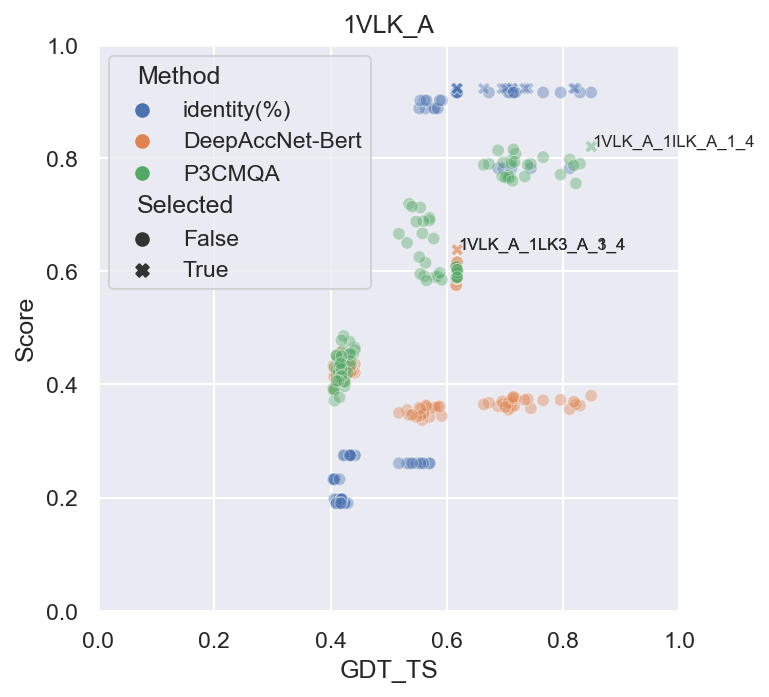

,model,GDT_TS,Method,Score,Selected
93,1VLK_A_1ILK_A_1_1,0.715,identity(%),0.915,False
50,1VLK_A_1ILK_A_1_4,0.849,identity(%),0.915,False
70,1VLK_A_1INR_A_1_1,0.706,identity(%),0.915,False
63,1VLK_A_1ILK_A_1_5,0.718,identity(%),0.915,False
54,1VLK_A_1ILK_A_1_2,0.766,identity(%),0.915,False
76,1VLK_A_1INR_A_3_5,0.734,identity(%),0.923,True
59,1VLK_A_1ILK_A_3_3,0.664,identity(%),0.923,True
91,1VLK_A_1LK3_A_3_3,0.618,identity(%),0.923,True
90,1VLK_A_1INR_A_3_1,0.713,identity(%),0.923,True
64,1VLK_A_1LK3_A_3_4,0.618,identity(%),0.923,True


In [11]:
target = '1VLK_A'
methods = ['identity(%)', 'DeepAccNet-Bert', 'P3CMQA']
model_column = ['model', 'GDT_TS']
target_df = df.query('target == @target')[model_column + methods]
data = pd.melt(target_df, id_vars=model_column, var_name='Method', value_name='Score')
plt.figure(figsize=(5, 5))
plt.title(target)
name = 'Selected'
data[name] = False
identity_max_multi = False
for method in methods:
    max_score = data.query('Method == @method')['Score'].max()
    # idx = data.query('Method == @method')['Score'].idxmax()
    idx = data.query('Method == @method and Score == @max_score').index
    if len(idx) > 1:
        identity_max_multi = True
    print(idx)
    data.loc[idx, name] = True
ax = sns.scatterplot(data=data, x='GDT_TS', y='Score', hue='Method', alpha=0.4, style=name)
for i, row in data.query('{} == True'.format(name)).iterrows():
    if identity_max_multi and row['Method'] == 'identity(%)':
        continue
    label_point(row['GDT_TS'], row['Score'], row['model'], ax)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
data.query('Method == "identity(%)"').sort_values('Score')[-20:]

Int64Index([16, 79, 82, 106, 117, 122], dtype='int64')
Int64Index([295], dtype='int64')
Int64Index([425], dtype='int64')
identity(%) 2I2Y_A_2HVZ_A_1_3
identity(%) 2I2Y_A_2HVZ_A_1_4
identity(%) 2I2Y_A_2HVZ_A_1_1
identity(%) 2I2Y_A_2HVZ_A_2_4
identity(%) 2I2Y_A_2HVZ_A_2_3
identity(%) 2I2Y_A_2HVZ_A_2_2
DeepAccNet-Bert 2I2Y_A_5TBX_A_2_2
P3CMQA 2I2Y_A_2RRB_A_2_5


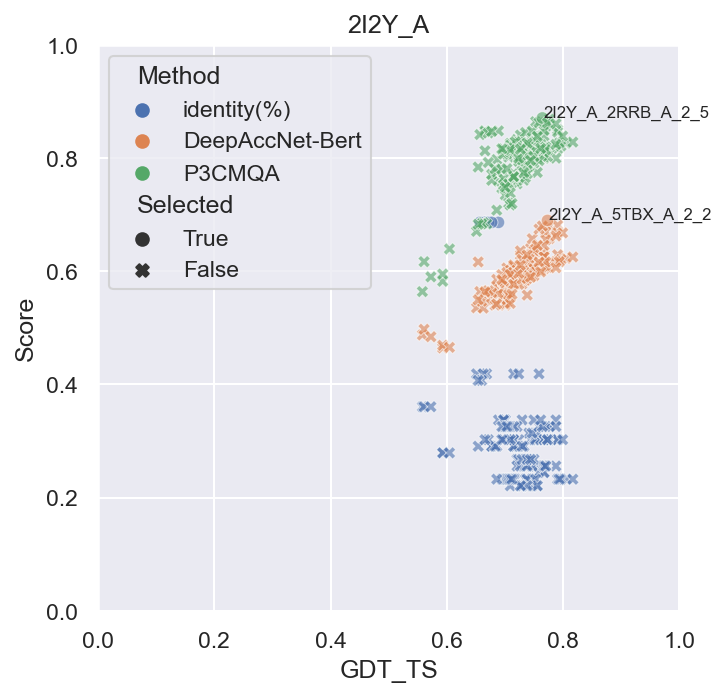

,model,GDT_TS,Method,Score,Selected
148,2I2Y_A_2MB0_B_1_4,0.788,identity(%),0.337,False
70,2I2Y_A_2MKS_A_1_3,0.701,identity(%),0.337,False
81,2I2Y_A_2MKS_A_1_1,0.698,identity(%),0.337,False
48,2I2Y_A_2N3L_A_1_4,0.573,identity(%),0.360,False
1,2I2Y_A_2N3L_A_1_5,0.558,identity(%),0.360,False
19,2I2Y_A_2N3L_A_1_2,0.561,identity(%),0.360,False
108,2I2Y_A_6HPJ_B_2_3,0.660,identity(%),0.407,False
147,2I2Y_A_6HPJ_B_2_4,0.654,identity(%),0.407,False
12,2I2Y_A_6HPJ_B_1_1,0.651,identity(%),0.419,False
119,2I2Y_A_1X4A_A_1_2,0.715,identity(%),0.419,False


In [12]:
target = '2I2Y_A'
methods = ['identity(%)', 'DeepAccNet-Bert', 'P3CMQA']
model_column = ['model', 'GDT_TS']
target_df = df.query('target == @target')[model_column + methods]
data = pd.melt(target_df, id_vars=model_column, var_name='Method', value_name='Score')
plt.figure(figsize=(5, 5))
plt.title(target)
name = 'Selected'
data[name] = False
identity_max_multi = False
for method in methods:
    max_score = data.query('Method == @method')['Score'].max()
    # idx = data.query('Method == @method')['Score'].idxmax()
    idx = data.query('Method == @method and Score == @max_score').index
    if len(idx) > 1:
        identity_max_multi = True
    print(idx)
    data.loc[idx, name] = True
ax = sns.scatterplot(data=data, x='GDT_TS', y='Score', hue='Method', alpha=0.6, style=name, style_order=[True, False])
for i, row in data.query('{} == True'.format(name)).iterrows():
    print(row['Method'], row['model'])
    if identity_max_multi and row['Method'] == 'identity(%)':
        continue
    label_point(row['GDT_TS'], row['Score'], row['model'], ax)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
data.query('Method == "identity(%)"').sort_values('Score')[-20:]

Int64Index([105, 120, 145], dtype='int64')
Int64Index([294], dtype='int64')
Int64Index([442], dtype='int64')
identity(%) 2DYK_A_3J8G_X_3_3 0.675
identity(%) 2DYK_A_3J8G_X_3_1 0.6767
identity(%) 2DYK_A_3J8G_X_3_2 0.6667
DeepAccNet-Bert 2DYK_A_3R9W_A_2_3 0.7617
P3CMQA 2DYK_A_5X4B_A_1_2 0.8217


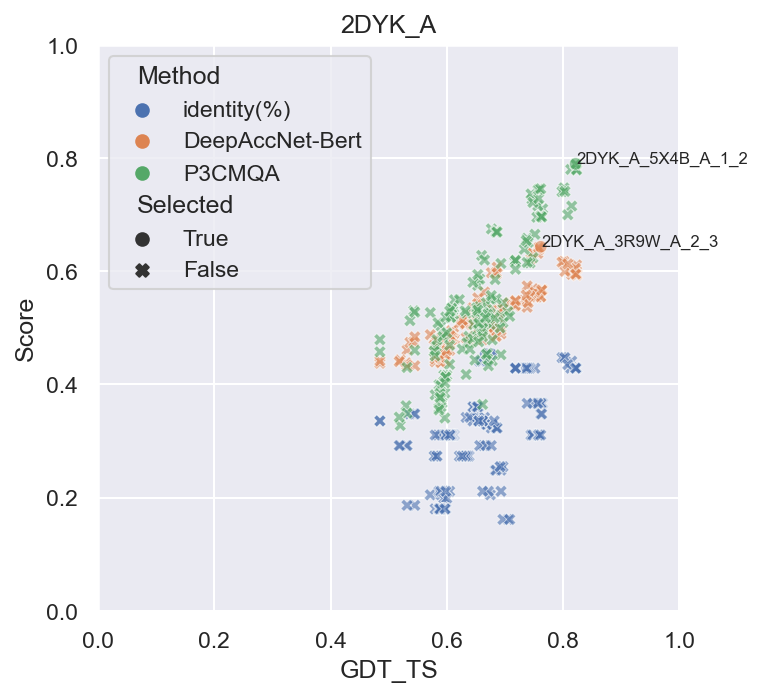

,model,GDT_TS,Method,Score,Selected
107,2DYK_A_5M7H_A_1_5,0.717,identity(%),0.429,False
69,2DYK_A_4KYU_A_1_2,0.813,identity(%),0.429,False
118,2DYK_A_4DCS_A_1_3,0.733,identity(%),0.429,False
114,2DYK_A_2HJG_A_1_3,0.743,identity(%),0.429,False
122,2DYK_A_2HJG_A_1_2,0.738,identity(%),0.429,False
97,2DYK_A_4DCS_A_1_1,0.752,identity(%),0.429,False
95,2DYK_A_5X4B_A_1_1,0.823,identity(%),0.429,False
132,2DYK_A_1MKY_A_2_3,0.808,identity(%),0.435,False
46,2DYK_A_3J8G_X_1_1,0.672,identity(%),0.441,False
15,2DYK_A_3J8G_X_1_2,0.668,identity(%),0.441,False


In [13]:
target = '2DYK_A'
methods = ['identity(%)', 'DeepAccNet-Bert', 'P3CMQA']
model_column = ['model', 'GDT_TS']
target_df = df.query('target == @target')[model_column + methods]
data = pd.melt(target_df, id_vars=model_column, var_name='Method', value_name='Score')
plt.figure(figsize=(5, 5))
plt.title(target)
name = 'Selected'
data[name] = False
identity_max_multi = False
for method in methods:
    max_score = data.query('Method == @method')['Score'].max()
    # idx = data.query('Method == @method')['Score'].idxmax()
    idx = data.query('Method == @method and Score == @max_score').index
    if len(idx) > 1:
        identity_max_multi = True
    print(idx)
    data.loc[idx, name] = True
ax = sns.scatterplot(data=data, x='GDT_TS', y='Score', hue='Method', alpha=0.6, style=name, style_order=[True, False])
for i, row in data.query('{} == True'.format(name)).iterrows():
    print(row['Method'], row['model'], row['GDT_TS'])
    if identity_max_multi and row['Method'] == 'identity(%)':
        continue
    label_point(row['GDT_TS'], row['Score'], row['model'], ax)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
data.query('Method == "identity(%)"').sort_values('Score')[-20:]

Int64Index([43, 47], dtype='int64')
Int64Index([267], dtype='int64')
Int64Index([433], dtype='int64')
identity(%) 1EXR_A_5E1K_A_1_4 0.5582
identity(%) 1EXR_A_5E1K_A_1_5 0.6541
DeepAccNet-Bert 1EXR_A_4DJC_A_1_3 0.7568
P3CMQA 1EXR_A_5DOW_A_1_3 0.5


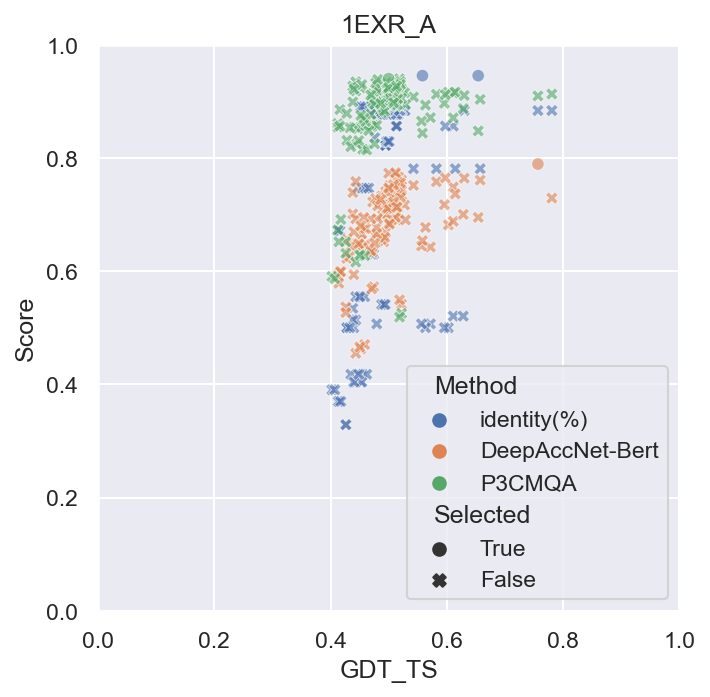

,model,GDT_TS,Method,Score,Selected
80,1EXR_A_3EK4_A_3_3,0.522,identity(%),0.884,False
102,1EXR_A_1IQ5_A_1_1,0.529,identity(%),0.884,False
112,1EXR_A_1IQ5_A_1_4,0.527,identity(%),0.884,False
111,1EXR_A_3SG6_A_2_1,0.498,identity(%),0.884,False
75,1EXR_A_3O77_A_3_5,0.473,identity(%),0.884,False
101,1EXR_A_1IQ5_A_1_2,0.514,identity(%),0.884,False
107,1EXR_A_1A29_A_1_1,0.503,identity(%),0.884,False
149,1EXR_A_3EK4_A_3_4,0.519,identity(%),0.884,False
105,1EXR_A_3EK8_A_2_5,0.512,identity(%),0.884,False
104,1EXR_A_3EK8_A_2_2,0.507,identity(%),0.884,False


In [14]:
target = '1EXR_A'
methods = ['identity(%)', 'DeepAccNet-Bert', 'P3CMQA']
model_column = ['model', 'GDT_TS']
target_df = df.query('target == @target')[model_column + methods]
data = pd.melt(target_df, id_vars=model_column, var_name='Method', value_name='Score')
plt.figure(figsize=(5, 5))
plt.title(target)
name = 'Selected'
data[name] = False
identity_max_multi = False
for method in methods:
    max_score = data.query('Method == @method')['Score'].max()
    # idx = data.query('Method == @method')['Score'].idxmax()
    idx = data.query('Method == @method and Score == @max_score').index
    if len(idx) > 1:
        identity_max_multi = True
    print(idx)
    data.loc[idx, name] = True
ax = sns.scatterplot(data=data, x='GDT_TS', y='Score', hue='Method', alpha=0.6, style=name, style_order=[True, False])
for i, row in data.query('{} == True'.format(name)).iterrows():
    print(row['Method'], row['model'], row['GDT_TS'])
    if identity_max_multi and row['Method'] == 'identity(%)':
        continue
    # label_point(row['GDT_TS'], row['Score'], row['model'], ax)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
data.query('Method == "identity(%)"').sort_values('Score')[-20:]